In [2]:
import maxim_models as mm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def log_progress(sequence, every=1):
    from ipywidgets import IntProgress
    from IPython.display import display

    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)
    
    for index, record in enumerate(sequence):
        if index % every == 0:
            progress.value = index
        yield record
    progress.bar_style='success'
    progress.value = len(sequence)

## Dataset 1

In [66]:
sigmas

array([ 0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
        1.8,  1.9,  2. ])

In [59]:
sigmas = np.linspace(0.7, 2, 14)
m1 = -0.5
m2 = 0.5
train_size = 400
test_size = 200
tests_num = 3
results = np.zeros([len(sigmas), 3])

lin_m = mm.one_weight_linear_model(method='linprog')
rel_m = mm.one_weight_linear_model(method='relax')
log_m = mm.one_weight_linear_model(method='logistic')
soft_m = mm.many_weight_linear_model(method='softmax')
svm_m = mm.many_weight_linear_model(method='svm')
models = [rel_m, soft_m, svn_m]

In [68]:
X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[1], size=[int(train_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[1], size=[int(train_size / 2), 2000])))
y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))

In [65]:
import sklearn.linear_model.logistic as log
lm = log.LogisticRegression()

In [69]:
%%time
for i in log_progress(range(5)):
    lm.fit(X, y)
    #soft_m.fit(X, y)


CPU times: user 392 ms, sys: 4 ms, total: 396 ms
Wall time: 402 ms


In [70]:
sum(lm.predict(X)==y) / 400

1.0

In [60]:
sigmas *= 10

In [61]:
%%time
for it in log_progress(np.arange(len(sigmas)), every=1):
    tmp_results = np.zeros([tests_num, len(models)])
    for test in np.arange(tests_num):
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(train_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(train_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))
        for model in models:
            model.fit(X, y)
        
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(test_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(test_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(test_size / 2)), np.ones(test_size - int(test_size / 2))))
        
        for i in range(len(models)):
            tmp_results[test, i] = np.sum(models[i].predict(X) == y) / X.shape[0]
    results[it] = np.mean(tmp_results, axis=0)

CPU times: user 7min 9s, sys: 2min 49s, total: 9min 58s
Wall time: 6min 42s


In [104]:
results[:, 0]

array([ 0.983  ,  0.97875,  0.971  ,  0.95975,  0.912  ,  0.939  ,
        0.925  ,  0.91425,  0.90075,  0.84525,  0.8445 ,  0.87075,
        0.8425 ,  0.851  ])

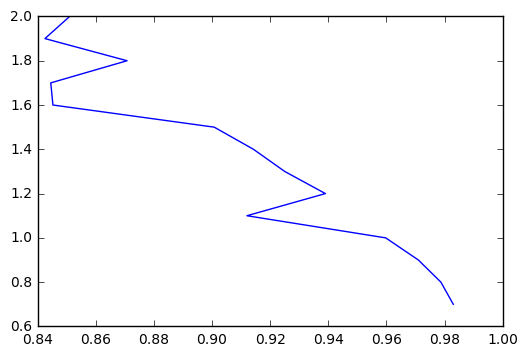

In [105]:
plt.plot(results[:, 1], sigmas)

In [77]:
log_res = []
for it in log_progress(np.arange(len(sigmas)), every=1):
    tmp_results = np.zeros([tests_num])
    for test in np.arange(tests_num):
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(train_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(train_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))
        lm.fit(X, y)
        
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(test_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(test_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(test_size / 2)), np.ones(test_size - int(test_size / 2))))
        
        tmp_results[test] = np.sum(lm.predict(X) == y) / X.shape[0]
    log_res.append(np.mean(tmp_results))

In [78]:
log_res

[0.99333333333333329,
 0.99166666666666659,
 0.95833333333333337,
 0.92833333333333334,
 0.89500000000000002,
 0.84166666666666667,
 0.84166666666666667,
 0.82833333333333348,
 0.76166666666666671,
 0.76500000000000001,
 0.74833333333333341,
 0.70999999999999996,
 0.66999999999999993,
 0.68000000000000005]

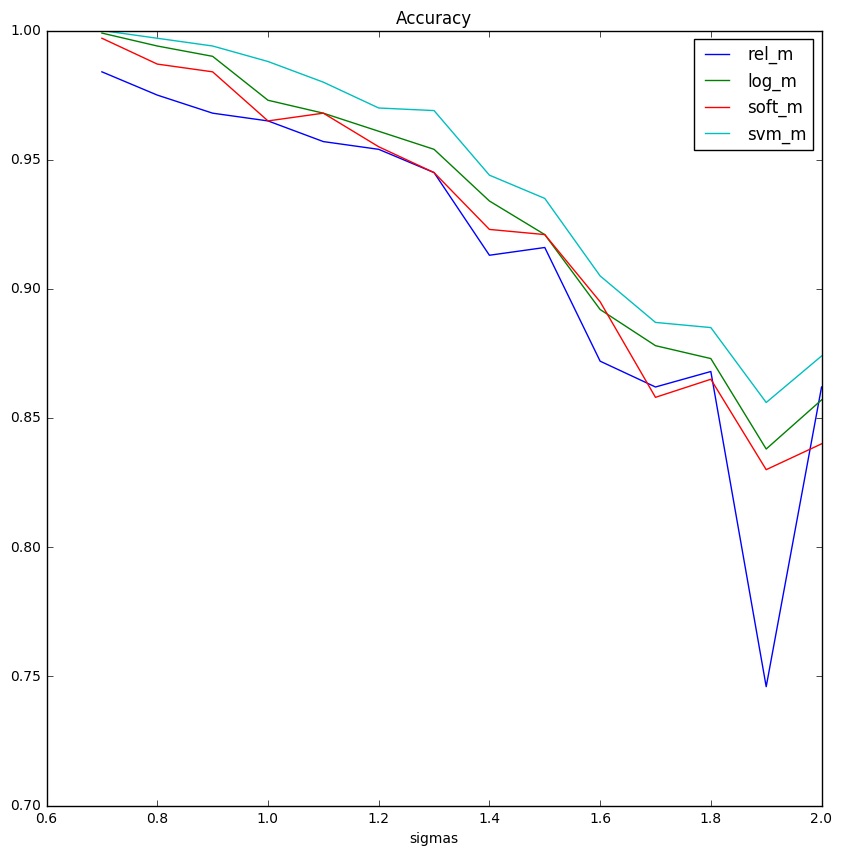

In [24]:
plt.figure(figsize=[10, 10])
plt.plot(sigmas, results[:, 0], label='rel_m')
plt.plot(sigmas, results[:, 1], label='log_m')
plt.plot(sigmas, results[:, 2], label='soft_m')
plt.plot(sigmas, results[:, 3], label='svm_m')
plt.legend()
plt.xlabel('sigmas')
plt.title('Accuracy')
#plt.savefig('first_dataset')

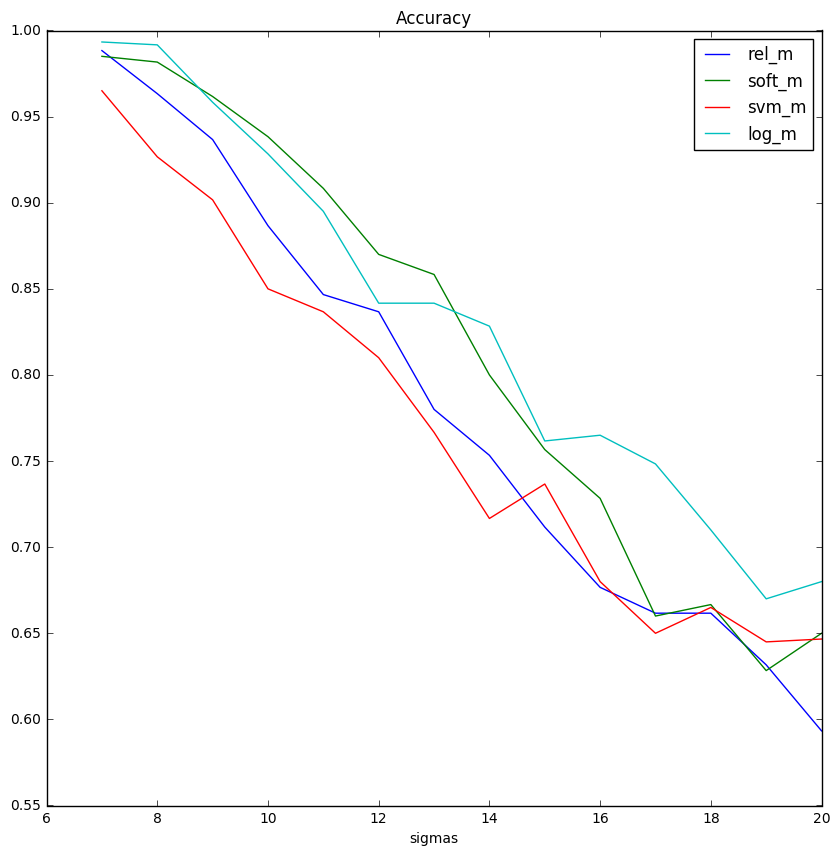

In [79]:
plt.figure(figsize=[10, 10])
plt.plot(sigmas, results[:, 0], label='rel_m')
plt.plot(sigmas, results[:, 1], label='soft_m')
plt.plot(sigmas, results[:, 2], label='svm_m')
plt.plot(sigmas, log_res, label='log_m')
plt.legend()
plt.xlabel('sigmas')
plt.title('Accuracy')
plt.savefig('third_dataset')

In [ ]:
%%time
for it in log_progress(np.arange(len(sigmas)), every=1):
    tmp_results = np.zeros([tests_num, len(models)])
    for test in np.arange(tests_num):
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(train_size / 2), 20]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(train_size / 2), 20])))
        y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))
        for model in models:
            model.fit(X, y)
        
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(test_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(test_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(test_size / 2)), np.ones(test_size - int(test_size / 2))))
        
        for i in range(len(models)):
            tmp_results[test, i] = np.sum(models[i].predict(X) == y) / X.shape[0]
    results[it] = np.mean(tmp_results, axis=0)